# Preprocessing of QC measures

## Cohorts
- MNI ET/NC, PPMI NC, ADNI2 NC

## Criterias
-  All QC scores (freesurfer, suit, maget) >=2

## Input
    MNI QC results:  ../tab_data/qc/mni_qc.csv
    
    PPMI QC results: ../tab_data/qc/ppmi_qc.csv
    
    ADNI QC results: ../tab_data/qc/adni_qc.csv
    
    Previous preproc results: ../tab_data/ADNI-PPMI_Des-cere_preped.csv
    
    Previous preproc results: ../tab_data/MNI_Des-cere_preped.csv

## Output 
    Output1: ../tab_data/all_Des-cere_preped_qcInfo.csv # Results with qc info.
    
    Output2: ../tab_data/all_Des-cere_preped_qcPass.csv # Results which passed QC.

In [1]:
## Preprocessing of ADNI and PPMI dataset freesurfer outputs
#lib and path
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np
data_dir = Path("/codes/tab_data")
adni_qc_file = data_dir/'qc'/'adni_qc.csv'; 
ppmi_qc_file = data_dir/'qc'/'ppmi_qc.csv';
mni_qc_file  = data_dir/'qc'/'mni_qc.csv';

adni_qc_df = pd.read_csv(adni_qc_file , sep=',', header=0, index_col=0);
ppmi_qc_df = pd.read_csv(ppmi_qc_file , sep=',', header=0, index_col=0);
mni_qc_df = pd.read_csv(mni_qc_file , sep=',', header=0, index_col=0);
adni_qc_df.index = [x.replace('-','_') for x in adni_qc_df.index];
ppmi_qc_df.index = [x.replace('-','_') for x in ppmi_qc_df.index];
mni_qc_df.index  = [x.replace('-','_') for x in mni_qc_df.index];

# previous preproc results:
mni_preproc_file = data_dir/'MNI_Des-cere_preped.csv'
other_preproc_file = data_dir/'ADNI-PPMI_Des-cere_preped.csv'
mni_data_df = pd.read_csv(mni_preproc_file , sep=',', header=0, index_col=0);
other_data_df = pd.read_csv(other_preproc_file , sep=',', header=0, index_col=0);

# Current results:
qcinfo_file = data_dir/'all_Des-cere_preped_qcInfo.csv'
qced_file   = data_dir/'all_Des-cere_preped_qcPass.csv'

In [2]:
## threshold by QC results, criterias: all QC scores >=2
qc_th=2
mni_data_df=mni_data_df.join(mni_qc_df, how='left');
other_data_df=other_data_df.join(pd.concat([adni_qc_df, ppmi_qc_df]), how='left');
all_data_df=pd.concat([mni_data_df,other_data_df])
all_data_qc_df=all_data_df[(all_data_df['freesurfer_score']>=qc_th)&(all_data_df['suit_score']>=qc_th)&(all_data_df['maget_score']>=qc_th)]

In [3]:
# print qc results statistics
group_names = all_data_df.group.unique()
print('Original number / QC pass number')
for x_ in group_names:
    print(all_data_df[all_data_df['group']==x_].shape[0],'/',
          all_data_qc_df[all_data_qc_df['group']==x_].shape[0])

Original number / QC pass number
38 / 34
32 / 29
309 / 223
116 / 78


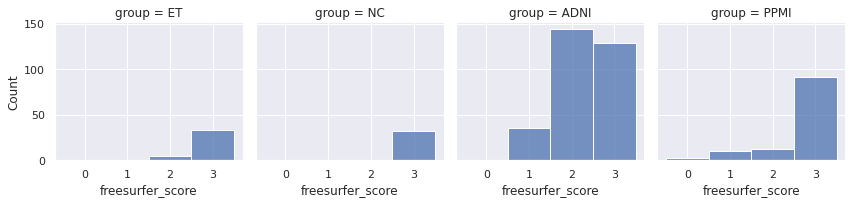

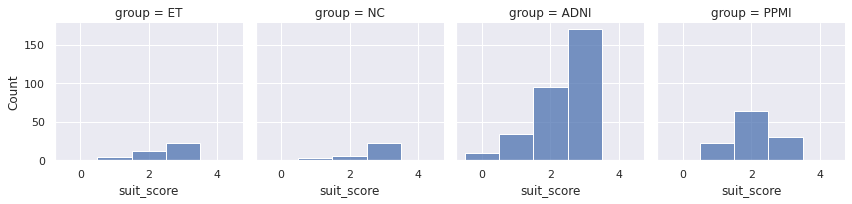

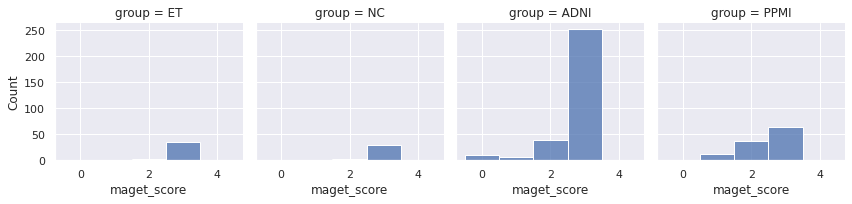

In [4]:
# visualize the QC measures for different datasets
vis_df = all_data_df.copy();
qc_items=adni_qc_df.columns
sns.set_theme(style="darkgrid")
for qc_item_ in qc_items:
    sns.displot(vis_df, x=qc_item_, col="group", discrete=1,
                binwidth=3, height=3, facet_kws=dict(margin_titles=True))

In [5]:
# save results
#qcinfo_file = data_dir/'all_Des-cere_preped_qcInfo.csv'
#qced_file   = data_dir/'all_Des-cere_preped_qcPass.csv'
all_data_df.to_csv(qcinfo_file)
all_data_qc_df.to_csv(qced_file)